## Owais Aijaz 7610
## oa07610@st.habib.edu.pk

## CS/CE 457/464 Homework 08

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv('baskin_robbins_icecream.csv')
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [17]:
X = df.drop(["Flavour", "Category"], axis=1)
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0


In [25]:
scaler = MinMaxScaler()
#transform data
XS = scaler.fit_transform(X)
XS[1:5]

array([[0.34615385, 0.15      , 0.4       , 0.24      , 0.375     ,
        0.375     ],
       [0.38461538, 0.15      , 0.6       , 0.32      , 0.45833333,
        0.375     ],
       [0.19230769, 0.06666667, 0.2       , 0.16      , 0.5       ,
        0.375     ],
       [0.23076923, 0.03333333, 0.2       , 0.52      , 0.66666667,
        0.25      ]])

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
#Finding the optimum number of clusters for k-means clustering
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init=10, random_state = 42)
    kmeans.fit_predict(XS)
    wss.append(kmeans.inertia_)

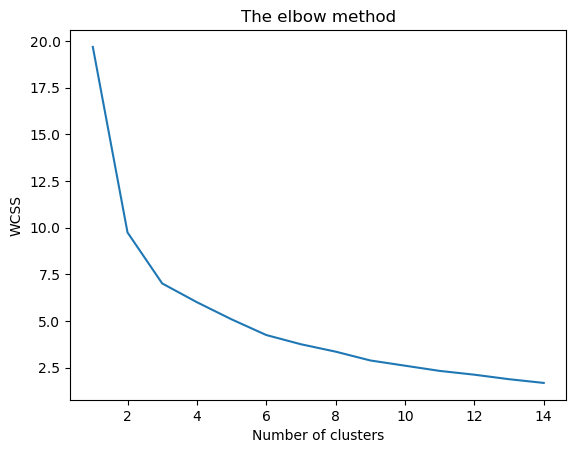

In [119]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squaY
plt.show()

In [92]:
#Finding the optimum number of clusters for k-means clustering
silhouette_avg = []  #Average Silhouette Scores

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(XS)
    silhouette_avg.append(silhouette_score(XS, cluster_labels))

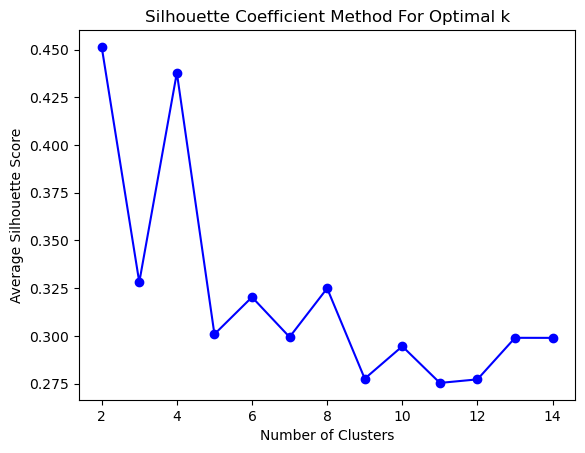

In [93]:
plt.plot(range(2, 15), silhouette_avg, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Coefficient Method For Optimal k')
plt.show()

##### Optimal Clusters:

2 clusters would be optimal for maximizing cohesion and separation (based on the silhouette score). 3 clusters would also be a reasonable choice as it'll be a bit more complexity, as suggested by the WSS plot. I think 4 clusters would be a good option if we consider both the Silhouette Score and the WSS plot. 

In [152]:
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)

In [154]:
Y

array([1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 3, 1, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 3, 3, 0, 3, 3, 2,
       3, 3, 1, 0])

##### The provided array is the outcome of implementing k-means clustering on the given dataset with a value of k set to 4.

In [157]:
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.37184830992270346

##### Visualizing the clustering results.

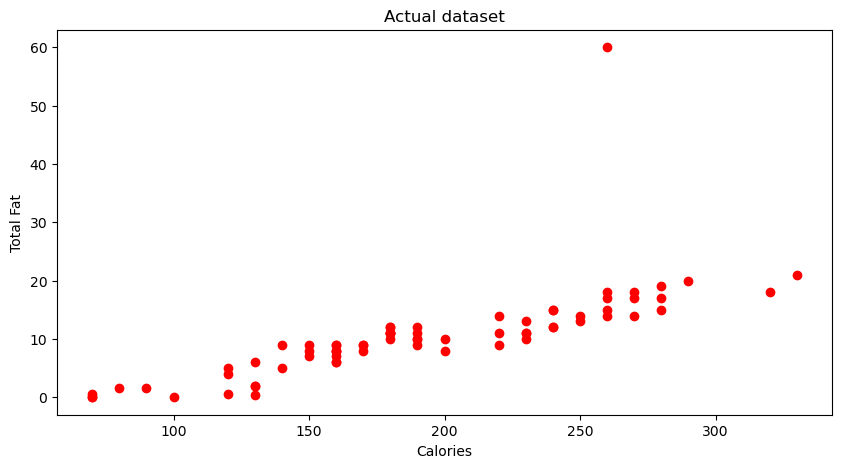

In [160]:
#Before Clustering

plt.figure(figsize=(10, 5))
plt.scatter(df['Calories'], df['Total Fat (g)'], color='red')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Actual dataset")
plt.show()

#Weak co-relation between the two variables is shown.

Text(0.5, 1.0, 'Post-clustering dataset')

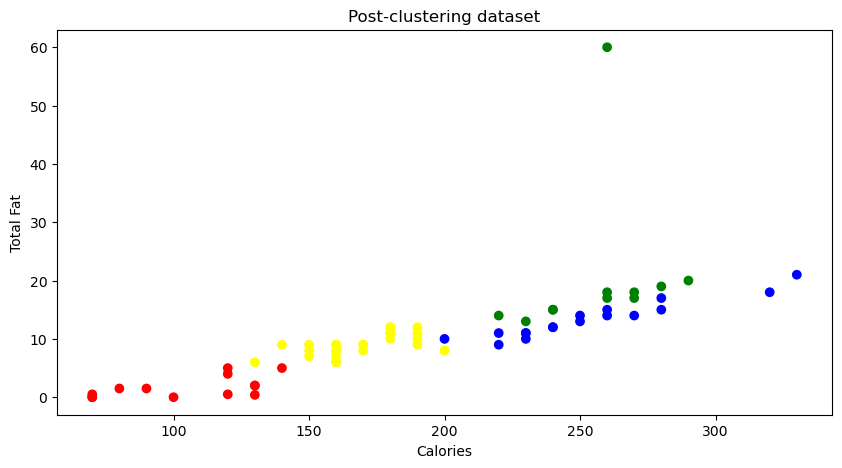

In [179]:
#After the clustering

plt.figure(figsize=(10, 5))
color2=np.array(['green','yellow','blue','red'])
plt.scatter(df['Calories'], df['Total Fat (g)'],c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Post-clustering dataset")

Text(0.5, 1.0, 'Post-clustering dataset')

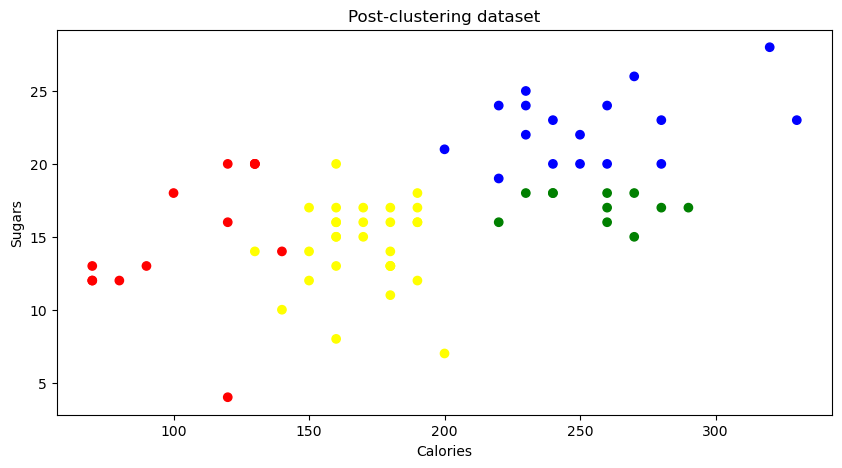

In [171]:
#After the clustering

plt.figure(figsize=(10, 5))
color2=np.array(['green','yellow','blue','red'])
plt.scatter(df['Calories'], df['Sugars (g)'],c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Sugars')
plt.title("Post-clustering dataset")

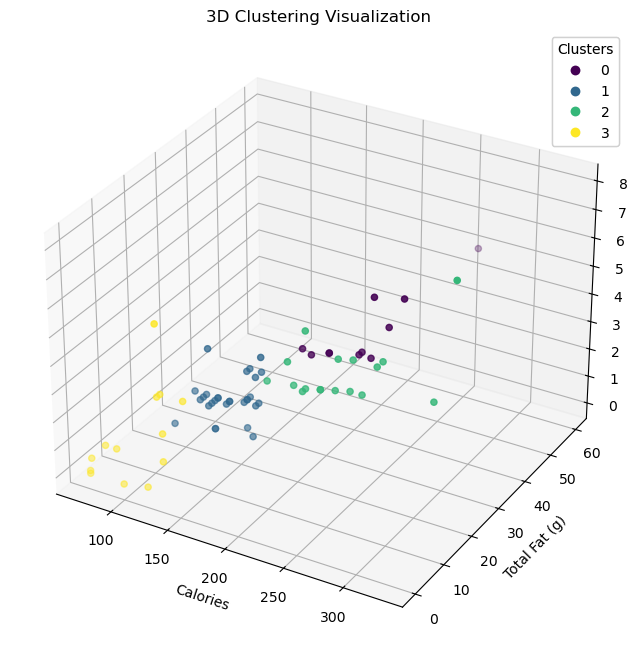

In [164]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Scatter plot with different colors for each cluster
scatter = ax.scatter(X["Calories"], X["Total Fat (g)"], X["Protein (g)"], c=Y, cmap="viridis", marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

#Set axis labels
ax.set_xlabel("Calories")
ax.set_ylabel("Total Fat (g)")
ax.set_zlabel("Protein (g)")

plt.title("3D Clustering Visualization")
plt.show()

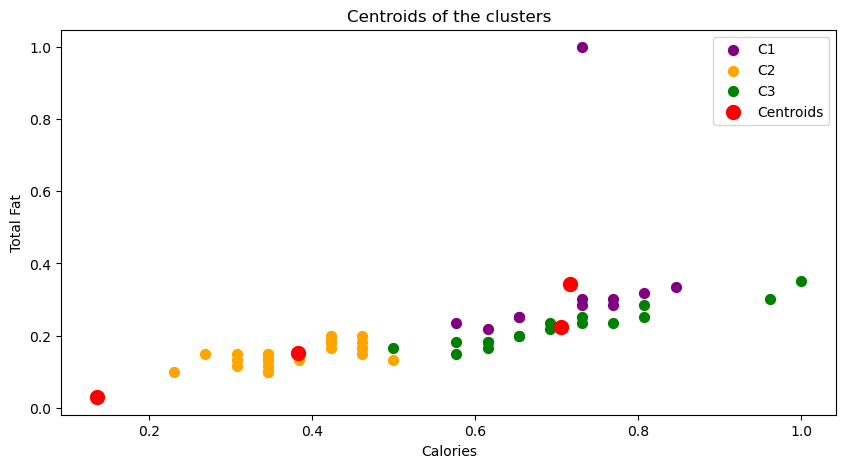

In [174]:
# Visualising the clusters
plt.figure(figsize=(10, 5))
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s=50, c='purple', label='C1')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s=50, c='orange', label='C2')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s=50, c='green', label='C3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.title("Centroids of the clusters")
plt.legend()
plt.show()

##### This plot provides a visual understanding of how the data is divided into 4 clusters based on the two featuY, showing the relative positioning of clusters and their centroids in a 2D feature space.

In [184]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]
C4 = X.iloc[Y == 3, :]

In [188]:
C1.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
11,230,13.0,0.4,25,18,5.0
12,240,15.0,0.5,23,18,5.0
19,270,17.0,0.4,25,18,5.0
35,260,17.0,0.4,22,17,5.0
37,240,15.0,0.5,23,18,5.0


In [190]:
C2.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0
5,150,8.0,0.3,18,14,3.0
7,170,8.0,0.2,21,17,3.0


In [192]:
C3.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
9,220,11.0,0.4,26,19,4.0
13,280,15.0,0.5,31,23,5.0
15,280,17.0,0.4,29,20,5.0
20,240,12.0,0.4,31,20,4.0
25,240,12.0,0.4,30,23,4.0


In [194]:
C4.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
3,120,4.0,0.1,17,16,3.0
4,130,2.0,0.1,26,20,2.0
6,120,5.0,0.1,21,4,3.0
17,100,0.0,0.0,25,18,0.0
33,70,0.0,0.0,16,12,0.0


In [197]:
C1.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,256.363636,20.545455,0.436364,22.818182,17.090909,5.454545
std,21.574396,13.261702,0.050452,1.887760,1.044466,0.820200
min,220.000000,13.000000,0.400000,20.000000,15.000000,5.000000
25%,240.000000,15.000000,0.400000,21.500000,16.500000,5.000000
50%,260.000000,17.000000,0.400000,23.000000,17.000000,5.000000
75%,270.000000,18.500000,0.500000,24.500000,18.000000,5.500000
max,290.000000,60.000000,0.500000,25.000000,18.000000,7.000000


In [199]:
C2.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,169.655172,9.103448,0.258621,20.000000,14.413793,3.103448
std,17.004781,1.799699,0.062776,4.667517,2.934003,0.772049
min,130.000000,6.000000,0.200000,13.000000,7.000000,2.000000
25%,160.000000,8.000000,0.200000,18.000000,13.000000,3.000000
50%,170.000000,9.000000,0.300000,20.000000,15.000000,3.000000
75%,180.000000,11.000000,0.300000,21.000000,16.000000,3.000000
max,200.000000,12.000000,0.400000,38.000000,20.000000,5.000000


In [201]:
C3.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,253.529412,13.352941,0.388235,29.529412,22.588235,4.647059
std,34.630401,3.180825,0.060025,2.527787,2.450990,1.057188
min,200.000000,9.000000,0.200000,24.000000,19.000000,4.000000
25%,230.000000,11.000000,0.400000,29.000000,20.000000,4.000000
50%,250.000000,13.000000,0.400000,30.000000,23.000000,4.000000
75%,270.000000,15.000000,0.400000,30.000000,24.000000,5.000000
max,330.000000,21.000000,0.500000,36.000000,28.000000,8.000000


In [203]:
C4.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,105.384615,1.723077,0.038462,20.769231,14.923077,1.592308
std,26.336092,1.838547,0.050637,4.585373,4.716311,1.763265
min,70.000000,0.000000,0.000000,16.000000,4.000000,0.000000
25%,80.000000,0.400000,0.000000,17.000000,12.000000,0.100000
50%,120.000000,1.500000,0.000000,20.000000,14.000000,1.000000
75%,130.000000,2.000000,0.100000,25.000000,20.000000,3.000000
max,140.000000,5.000000,0.100000,27.000000,20.000000,6.000000


In [207]:
calories = [C1['Calories'].mean(), C2['Calories'].mean(), C3['Calories'].mean(), C4['Calories'].mean()]
print("Mean Calories = ", calories)

Mean Calories =  [256.3636363636364, 169.6551724137931, 253.52941176470588, 105.38461538461539]


In [210]:
TotalFat = [C1['Total Fat (g)'].mean(), C2['Total Fat (g)'].mean(), C3['Total Fat (g)'].mean(), C4['Total Fat (g)'].mean()]
print("Total Mean Fat = ", TotalFat)

Total Mean Fat =  [20.545454545454547, 9.10344827586207, 13.352941176470589, 1.723076923076923]


In [213]:
Carbohydrates = [C1['Carbohydrates (g)'].mean(), C2['Carbohydrates (g)'].mean(), C3['Carbohydrates (g)'].mean(), C4['Carbohydrates (g)'].mean()]
print("Total Mean Carbohydrates = ", Carbohydrates)

Total Mean Carbohydrates =  [22.818181818181817, 20.0, 29.529411764705884, 20.76923076923077]


In [218]:
Sugars = [C1['Sugars (g)'].mean(), C2['Sugars (g)'].mean(), C3['Sugars (g)'].mean(), C4['Sugars (g)'].mean()]
print("Total Mean Sugars = ", Sugars)

Total Mean Sugars =  [17.09090909090909, 14.413793103448276, 22.58823529411765, 14.923076923076923]


In [220]:
Protein = [C1['Protein (g)'].mean(), C2['Protein (g)'].mean(), C3['Protein (g)'].mean(), C4['Protein (g)'].mean()]
print("Total Mean Protein = ", Protein)

Total Mean Protein =  [5.454545454545454, 3.103448275862069, 4.647058823529412, 1.5923076923076924]


In [226]:
TransFat = [C1['Trans Fat (g)'].mean(), C2['Trans Fat (g)'].mean(), C3['Trans Fat (g)'].mean(), C4['Trans Fat (g)'].mean()]
print("Total Mean Trans Fat = ", TransFat)

Total Mean Trans Fat =  [0.43636363636363645, 0.2586206896551724, 0.38823529411764707, 0.038461538461538464]


#### Insights:

##### Cluster 1:
High Calories: This cluster has the highest mean calorie count at around 256 kcal.<br/>
High Fat Content: It has the highest mean fat content (20.5 g) among all clusters, indicating a rich fat profile.<br/>Moderate Protein: This group has a relatively high protein content (5.45 g), which suggests a balanced macronutrient profile with a higher energy density.

##### Cluster 2:
Moderate Calories: This cluster has a moderate mean calorie level of about 170 kcal. <br/>
Low to Moderate Fat: It has a mean fat content of 9.1 g, indicating a balanced profile without being overly fatty.<br/>
Moderate Sugar and Protein: With mean sugar and protein contents at 14.4 g and 3.1 g respectively, this cluster leans towards a balanced macronutrient distribution.

##### Cluster 3:
High Carbohydrates and Sugars: This cluster has the highest mean carbohydrate (29.5 g) and sugar (22.6 g) content among all clusters.<br/>
Moderate Calories and Fat: It has a mean calorie count close to 253 kcal and a moderate fat content of 13.4 g.<br/>
Moderate Protein: With a mean protein level of 4.6 g, this cluster is not overly protein-rich but still offers a moderate amount.

##### Cluster 4:
Low Calories and Fat: This cluster has the lowest calorie count (mean of about 105 kcal) and the lowest fat content (1.7 g).<br/>
Low Protein: This cluster has a minimal protein content (1.6 g on average), indicating a lighter nutritional profile overall.<br/>
Moderate Carbohydrates and Sugars: Although the calories are low, the carbohydrate (20.8 g) and sugar (14.9 g) levels are moderate.

#### Names:

##### Cluster 1: High-Calorie Boosters

##### Cluster 2: Balanced Bites

##### Cluster 3: Sweet Carbo Loaders

##### Cluster 4: Light Eaters